In [ ]:
# Logistic Regression Theory
# Logistic Regression is a Machine Learning classification algorithm that is used 
# to predict the probability of a categorical dependent variable. In logistic regression, 
# the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) 
# or 0 (no, failure, etc.). 
# In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [ ]:
# Assumptions of Logistic Regression
#1. Binary logistic regression requires the dependent variable to be binary.
#2. For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
#3. Only the meaningful variables should be included.
#4. The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
#5. he independent variables are linearly related to the log odds.
#6. Logistic regression requires quite large sample sizes.

In [ ]:
# Dataset

# The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) 
# of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) 
# to a term deposit (variable y). 
# It can be downloaded from https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv

In [1]:
#import the required libraries

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
#Import the dataset using pandas

data = pd.read_csv('C:/Users/Dhruba/Desktop/GitHub/Python/Data/bank.csv', header =0)

# Drop NAs
data = data.dropna()

# Data Descriptions
print(data.shape)
print(list(data.columns))
data.head() # first 5 rows
data.tail() # last 5 rows

(45211, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [4]:
# Data Explorations: trying to understand the data
data['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [5]:
# Understanding Y
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [6]:
# Making changes to variable for further analysis
data['y']=np.where(data['y'] =='yes', 1, data['y'])
data['y']=np.where(data['y'] =='no', 0, data['y'])

data['poutcome']=np.where(data['poutcome']=='unknown','other',data['poutcome'])

In [7]:
print(data['poutcome'].unique())
print(data['y'].value_counts())

['other' 'failure' 'success']
0    39922
1     5289
Name: y, dtype: int64


percentage of no subscription is 88.302
percentage of subscription 11.698


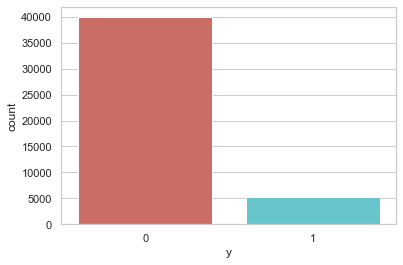

In [10]:
sns.countplot(x='y', data=data, palette = 'hls')
plt.show
# to save in directory
#plt.savefig('C:/Users/Dhruba/Desktop/GitHub/Python/Data/count_plot.jpeg')

count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", round(pct_of_no_sub*100,3))
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", round(pct_of_sub*100,3))

In [12]:
# The groups are imbalanced, and the ratio of no-subscription to subscription instances is 88:12. 
# Some more explorations

print(data.groupby('y').mean())
print(data.groupby('job').mean())
print(data.groupby('marital').mean())
print(data.groupby('education').mean())

         age      balance        day    duration  campaign      pdays  \
y                                                                       
0  40.838986  1303.714969  15.892290  221.182806  2.846350  36.421372   
1  41.670070  1804.267915  15.158253  537.294574  2.141047  68.702968   

   previous  
y            
0  0.502154  
1  1.170354  
                     age      balance        day    duration  campaign  \
job                                                                      
admin.         39.289886  1135.838909  15.564301  246.896732  2.575324   
blue-collar    40.044081  1078.826654  15.442561  262.901562  2.816995   
entrepreneur   42.190989  1521.470074  15.702085  256.309348  2.799597   
housemaid      46.415323  1392.395161  16.002419  245.825000  2.820968   
management     40.449567  1763.616832  16.114189  253.995771  2.864348   
retired        61.626767  1984.215106  15.439488  287.361307  2.346731   
self-employed  40.484484  1647.970868  16.027866  268.15706

In [ ]:
# Observations:
#1. The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
#2. The pdays (days since the customer was last contacted) is higher for the customers who bought it. 
#3. Campaigns are lower for customers who bought the term deposit.

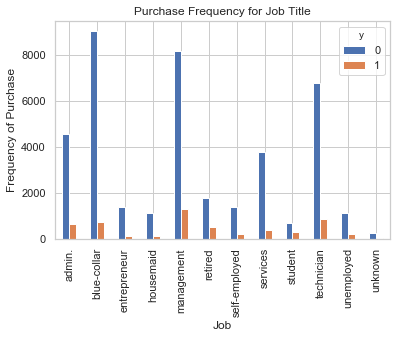

In [13]:
# Visualizations for better understanding of the data
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
# plt.savefig('C:/Users/Dhruba/Desktop/GitHub/Python/Data/purchase_fre_job')

# The frequency of purchase of the deposit depends a great deal on the job title.
# Thus, the job title can be a good predictor of the outcome variable.

Text(0, 0.5, 'Proportion of Customers')

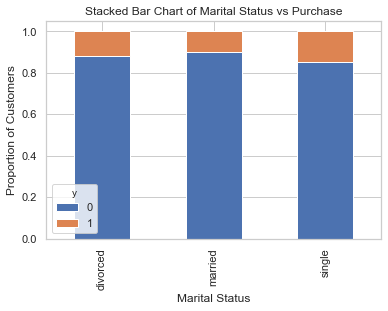

In [14]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
# plt.savefig('C:/Users/Dhruba/Desktop/GitHub/Python/Data/mariral_vs_pur_stack')

#The marital status does not seem a strong predictor for the outcome variable.

Text(0, 0.5, 'Proportion of Customers')

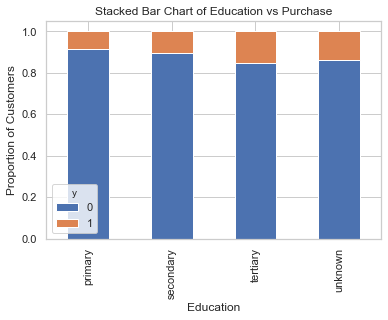

In [15]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
# plt.savefig('C:/Users/Dhruba/Desktop/GitHub/Python/Data/edu_vs_pur_stack')

# Education seems a good predictor of the outcome variable.

Text(0, 0.5, 'Frequency of Purchase')

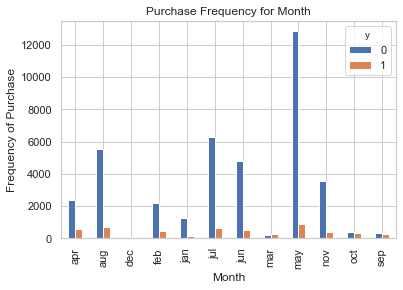

In [17]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
# plt.savefig('C:/Users/Dhruba/Desktop/GitHub/Python/Data/pur_fre_month_bar')

#Month might be a good predictor of the outcome variable.

Text(0, 0.5, 'Frequency')

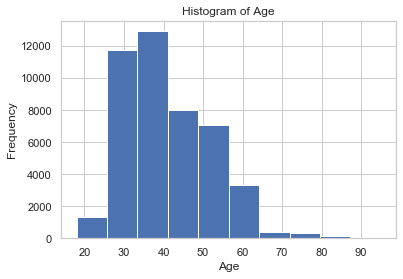

In [18]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
# plt.savefig('C:/Users/Dhruba/Desktop/GitHub/Python/Data/hist_age')

#Most of the customers of the bank in this dataset are in the age range of 30–40.

Text(0, 0.5, 'Frequency of Purchase')

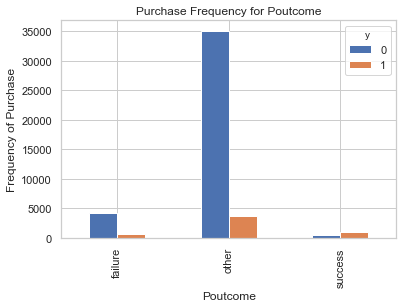

In [19]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
# plt.savefig('C:/Users/Dhruba/Desktop/GitHub/Python/Data/pur_fre_pout_bar')

# Poutcome seems to be a good predictor of the outcome variable.

In [20]:
# DUMMY VARIABLES: That is variables with only two values, zero and one.

cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [21]:
# Final Dataset for analysis

data_final=data[to_keep]
data_final.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success'],
      dtype=object)

In [22]:
# Over-sampling using SMOTE
# Using the SMOTE algorithm(Synthetic Minority Oversampling Technique) we balance our dataset. 
# At a high level, SMOTE: 
#1. Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
#2. Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [23]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
y=y.astype('int')

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  55906
Number of no subscription in oversampled data 27953
Number of subscription 27953
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [24]:
# Now there is a perfectly balanced dataset to be used for analysis.

In [25]:
# Recursive Feature Elimination
# Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model 
# and choose either the best or worst performing feature, setting the feature aside 
# and then repeating the process with the rest of the features. This process is applied until all features 
# in the dataset are exhausted. 
# The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [42]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Dhruba\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Dhruba\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

C:\Users\Dhruba\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Dhruba\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

[False False False False False False False  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True False False  True  True False False False False False False
 False False False False False False False False False False False False
 False False]
[27 31 26 29 25 30 28  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1
  1  1 23 24  1  1  7  6  5  4  3 16 11 18 14 10 13 17 21 15 12 19 20  9
  8 22]


In [44]:
# Selecting the columns
d = data_final_vars
d.remove('y')
d

cols= d
 
X=os_data_X[cols]
y=os_data_y['y']

In [45]:
os_data_X.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success'],
      dtype='object')

In [46]:
# Setting up the Logistic Model

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.143517
         Iterations 12
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.793     
Dependent Variable:  y                 AIC:               16146.9630
Date:                2020-07-11 13:34  BIC:               16593.5343
No. Observations:    55906             Log-Likelihood:    -8023.5   
Df Model:            49                LL-Null:           -38751.   
Df Residuals:        55856             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      12.0000                                        
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
age                  0.0203   0.0024   8.3554 0.0000  0.0155  0.0251
balance              0.0000

In [47]:
# Dropping the variable for which p-value is >0.05 : poutcome_failure, contact_unknown , previous
cols=['job_blue-collar', 'job_housemaid','month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
'month_may', 'month_nov', 'month_oct', "poutcome_success", 'default_no', 'default_yes', 'contact_telephone'] 
 
X=os_data_X[cols]
y=os_data_y['y']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.390274
         Iterations 7
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.437     
Dependent Variable:   y                AIC:              43667.2989
Date:                 2020-07-11 13:35 BIC:              43801.2703
No. Observations:     55906            Log-Likelihood:   -21819.   
Df Model:             14               LL-Null:          -38751.   
Df Residuals:         55891            LLR p-value:      0.0000    
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
                   Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
job_blue-collar   -1.2243   0.0434  -28.2343 0.0000 -1.3093 -1.1393
job_housemaid     -1.8136   0.1407  -12.8

In [48]:
# Logistic Regression Model Fitting
# Dividing into Train - Test Set
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [49]:
# Training the algorithm
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
# Predicting the test set results and calculating the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


In [52]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# The result is telling us that we have 7475+6974 correct predictions and 893+1430 incorrect predictions.

[[7475  893]
 [1430 6974]]


In [53]:
# Compute precision, recall, F-measure and support

# The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
# The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

# The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
# The recall is intuitively the ability of the classifier to find all the positive samples.

# The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches
# its best value at 1 and worst score at 0. The F-beta score weights the recall more than the precision by a factor of beta. 
# beta = 1.0 means recall and precision are equally important.

# The support is the number of occurrences of each class in y_test.


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Of the entire test set, 86% of the customer’s preferred term deposits that were promoted.

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      8368
           1       0.89      0.83      0.86      8404

    accuracy                           0.86     16772
   macro avg       0.86      0.86      0.86     16772
weighted avg       0.86      0.86      0.86     16772



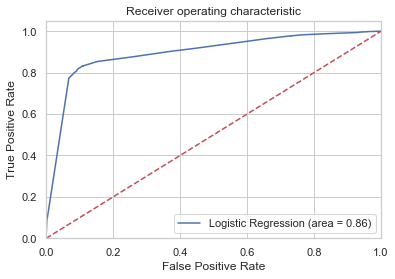

In [54]:
# ROC Curve
# The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. 
# The dotted line represents the ROC curve of a purely random classifier; 
# a good classifier stays as far away from that line as possible (toward the top-left corner).

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('C:/Users/Dhruba/Desktop/GitHub/Python/Data/Log_ROC')
plt.show()